# Bit coin prices

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
import json

Get the prices and make it as a DataFrame

In [143]:
times=[]
prices=[]
for year in range(2017,2021):
    year=str(year)
    months=['01','02','03','04','05','06','07','08','09','10','11','12']
    for i in range(11):
        start=year+'-'+months[i]+'-01'
        end=year+'-'+months[i+1]+'-01'
        url = 'https://api.nomics.com/v1/currencies/sparkline?key=63a6fb7bcdc2345fac6baed3afd92150&ids=BTC&start='+start+'T00%3A00%3A00Z&end='+end+'T00%3A00%3A00Z'
        k=urllib.request.urlopen(url).read()
        o=json.loads(k)
        times+=o[0]['timestamps']
        prices+=o[0]['prices']
    start=year+'-'+'12'+'-02'
    end=year+'-'+'12'+'-31'
    url = 'https://api.nomics.com/v1/currencies/sparkline?key=63a6fb7bcdc2345fac6baed3afd92150&ids=BTC&start='+start+'T00%3A00%3A00Z&end='+end+'T00%3A00%3A00Z'
    k=urllib.request.urlopen(url).read()
    o=json.loads(k)
    times+=o[0]['timestamps']
    prices+=o[0]['prices']
year=str(2021)
months=['01','02','03','04','05']
for i in range(4):
    start=year+'-'+months[i]+'-01'
    end=year+'-'+months[i+1]+'-01'
    url = 'https://api.nomics.com/v1/currencies/sparkline?key=63a6fb7bcdc2345fac6baed3afd92150&ids=BTC&start='+start+'T00%3A00%3A00Z&end='+end+'T00%3A00%3A00Z'
    k=urllib.request.urlopen(url).read()
    o=json.loads(k)
    times+=o[0]['timestamps']
    prices+=o[0]['prices']
start=year+'-'+months[4]+'-01'
end=year+'-'+months[4]+'-18'
url = 'https://api.nomics.com/v1/currencies/sparkline?key=63a6fb7bcdc2345fac6baed3afd92150&ids=BTC&start='+start+'T00%3A00%3A00Z&end='+end+'T00%3A00%3A00Z'
k=urllib.request.urlopen(url).read()
o=json.loads(k)
times+=o[0]['timestamps']
prices+=o[0]['prices']

dict1={'timestamps':times,'value':prices}
dfp=pd.DataFrame(dict1)
dfp.drop_duplicates(keep='first',inplace=True)
dfp.reset_index(inplace=True)
dfp.drop(['index'],axis=1,inplace=True)

KeyboardInterrupt: 

In [138]:
dfp

,timestamps,value
0,2015-01-01T00:00:00Z,314.96052397
1,2015-01-02T00:00:00Z,316.11027100
2,2015-01-03T00:00:00Z,280.03150107
3,2015-01-04T00:00:00Z,264.29097737
4,2015-01-05T00:00:00Z,275.06343530
...,...,...
2325,2021-05-14T00:00:00Z,50012.54033871
2326,2021-05-15T00:00:00Z,47068.72673401
2327,2021-05-16T00:00:00Z,46663.09732556
2328,2021-05-17T00:00:00Z,43603.75355342


In [139]:
df1=dfp.reset_index()['value']

Converting value into float type.

In [140]:
df1=pd.to_numeric(df1)

In [141]:
df1

0         314.960524
1         316.110271
2         280.031501
3         264.290977
4         275.063435
            ...     
2325    50012.540339
2326    47068.726734
2327    46663.097326
2328    43603.753553
2329    43447.069425
Name: value, Length: 2330, dtype: float64

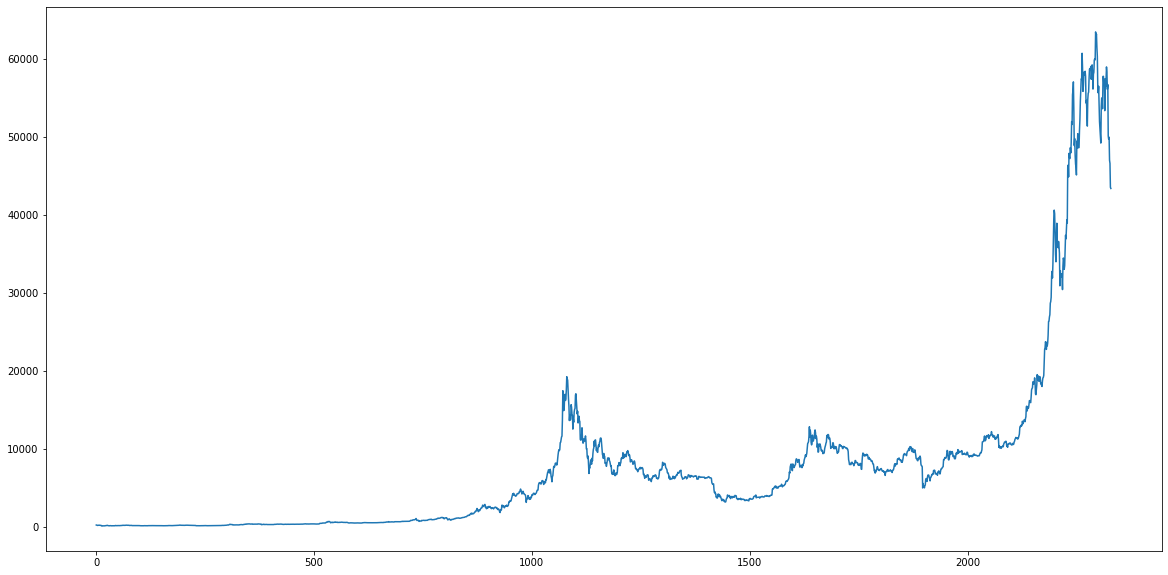

In [142]:
plt.figure(figsize=(20,10))
plt.plot(df1)

# Analysing the elon musk tweets

In [22]:
import tweepy
  
# Fill the X's with the credentials obtained by 
# following the above mentioned procedure.
consumer_key = "RkpAIk0680Uf4cck1VL8KDlGp" 
consumer_secret = "uwAJt4m83ok06ctBl2uxsZEwyEKREl0UQHuNZbl42FYwDV1ooH"
access_key = "717710478521159680-SGq3Pn7lJkuVGmnIGD6CY2PMF8zig59"
access_secret = "Bd039c2NwDRLnCROrqsiDSGkeRnpZ4OrP5uxs77JmXfng"
  
# Function to extract tweets
def get_tweets(username):
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth)
        number_of_tweets=5000
        tweets = api.user_timeline(screen_name=username,count=10000)
        yoo=[]
        for tweet in tweepy.Cursor(api.user_timeline, id=username).items():
            yoo.append(tweet)
        tmp=[]
        tmp1=[]
        tmp2=[]
        tmp3=[]
        tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created 
        tweets_for_csv1 = [tweet.text for tweet in yoo]
        for j in tweets_for_csv:
            tmp.append(j) 
        tweets_for_date = [tweet.created_at for tweet in tweets] # CSV file created 
        for j in tweets_for_csv1:
            tmp2.append(j) 
        tweets_for_date1 = [tweet.created_at for tweet in yoo] # CSV file created 
        for j in tweets_for_date:
            tmp1.append(j) 
        for j in tweets_for_date1:
            tmp3.append(j) 
        return tmp,tmp1,tmp2,tmp3 

In [43]:
def get_tweets1(username):
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth)
        number_of_tweets=5000
        yoo=[]
        for tweet in tweepy.Cursor(api.user_timeline, id=username).items(250):
            yoo.append(tweet)
        tmp2=[]
        tmp3=[]
        tweets_for_csv1 = [tweet.text for tweet in yoo]
        for j in tweets_for_csv1:
            tmp2.append(j) 
        tweets_for_date1 = [tweet.created_at for tweet in yoo] # CSV file created 
        for j in tweets_for_date1:
            tmp3.append(j) 
        return [tmp2,tmp3]

In [44]:
out,out1,out2,out3=get_tweets("@elonmusk") 

In [45]:
out2=get_tweets("@elonmusk")

In [46]:
len(out2[0])

200

In [14]:
for i in range(len(out)):
    x=out[i]
    x=x.lower()
    if('dog' in x):
        print('Found')
        print(x,out1[i])
        #j=times.index(str(out1[i])[:10]+'T00:00:00Z')
        #print(prices[j])

Found
working with doge devs to improve system transaction efficiency. potentially promising. 2021-05-13 22:45:16
Found
do you want tesla to accept doge? 2021-05-11 08:13:35
Found
spacex launching satellite doge-1 to the moon next year

– mission paid for in doge
– 1st crypto in space
– 1st mem… https://t.co/em885jsyvx 2021-05-09 22:41:43
Found
the dogefather
snl may 8 2021-04-28 06:20:47


LSTM's are sensitive to scale. We have to adress this issue.

Scale factor of 10 is used

In [95]:
dfuse=df1[2200:]/10

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [96]:
dfuse[:]

2200    0.000809
2201    0.000864
2202    0.000939
2203    0.000934
2204    0.000923
          ...   
2320    0.043150
2321    0.048647
2322    0.055663
2323    0.054569
2324    0.052331
Name: value, Length: 125, dtype: float64

In [97]:
##splitting dataset into train and test split
training_size=int(len(dfuse)*0.97)
test_size=len(dfuse)-training_size
dfuse=np.array(dfuse).reshape(-1,1)
train_data=(dfuse[0:training_size,:])
test_data=(dfuse[training_size:len(dfuse),:1])

In [98]:
training_size,test_size

(121, 4)

In [104]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [109]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [110]:
print(X_train.shape), print(y_train.shape)

(115, 5)
(115,)


(None, None)

In [111]:
print(X_test.shape), print(ytest.shape)

(0,)
(0,)


(None, None)

In [112]:
y_train

array([0.00091294, 0.00091738, 0.00090528, 0.00090503, 0.00082194,
       0.00085116, 0.00085698, 0.00087444, 0.00083759, 0.00082589,
       0.00074391, 0.00359314, 0.00462195, 0.00283527, 0.00369059,
       0.00350302, 0.0031397 , 0.00368855, 0.00528743, 0.00467447,
       0.00575722, 0.00781761, 0.00788397, 0.0070173 , 0.00727726,
       0.00697773, 0.00698557, 0.00665135, 0.00626223, 0.0056644 ,
       0.00536661, 0.00496039, 0.00587728, 0.00550506, 0.00543253,
       0.00560709, 0.00536663, 0.00472953, 0.00567906, 0.00518351,
       0.00506526, 0.0050235 , 0.0048222 , 0.00506053, 0.00505748,
       0.00505757, 0.00501611, 0.00496134, 0.00509593, 0.00519221,
       0.00626919, 0.00577105, 0.00559465, 0.00558686, 0.00554914,
       0.00623821, 0.00584525, 0.00571391, 0.00587187, 0.00578388,
       0.00574597, 0.00583943, 0.00592844, 0.00582144, 0.00550193,
       0.0053786 , 0.00519734, 0.00514297, 0.0053997 , 0.00543932,
       0.00536574, 0.00541161, 0.00541516, 0.00538192, 0.00626

# Model Creation

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\venka\anaconda3\lib\site-packages\google\protobuf\internal\type_checkers.py:235: RuntimeWarning: coroutine 'Twint.main' was never awaited
  class Int32ValueChecker(IntValueChecker):


In [18]:
pip install numpy==1.19 --user

Note: you may need to restart the kernel to use updated packages.


In [77]:
import tensorflow as tf

tf.__version__

'2.4.0'

In [130]:
model=Sequential()
model.add(LSTM(25,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(15))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [131]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 5, 25)             2700      
_________________________________________________________________
lstm_14 (LSTM)               (None, 15)                2460      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 5,176
Trainable params: 5,176
Non-trainable params: 0
_________________________________________________________________


In [114]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
tf.config.run_functions_eagerly(True)

In [132]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 3s 11ms/step - loss: 2.5413e-04
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 2.0823e-04
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 2.3191e-04
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 1.9380e-04
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 1.7137e-04
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 1.9634e-04
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 1.7673e-04
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 1.6828e-04
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 1.4039e-04
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 1.3613e-04
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 1.3472e-04
Epoch 12/100
2/2 [==============================] - 0s 6ms/step - loss: 1.1398e-04
Epoch 13/100

In [133]:
yout=model.predict(X_train)

In [127]:
yout.size

115

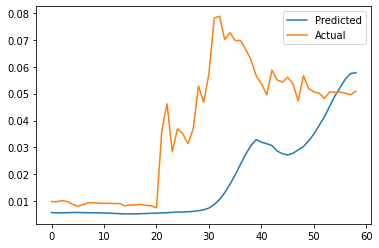

In [88]:
plt.plot(yout)
plt.plot(y_train[-1*yout.size:]*10)
plt.legend(['Predicted','Actual'])

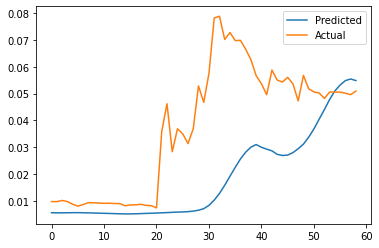

In [94]:
plt.plot(yout)
plt.plot(y_train[-1*yout.size:]*10)
plt.legend(['Predicted','Actual'])

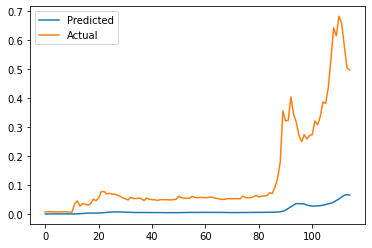

In [134]:
plt.plot(yout)
plt.plot(y_train*10)
plt.legend(['Predicted','Actual'])

In [145]:
yout.shape

(115, 1)